In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def fact(n):
    ret = 1
    while n>1:
        ret *= n
        n -= 1
    return ret

def fact_r(n):
    if n==2:
        return n
    return fact_r(n-1)*n

def perm_f(n, r):
    return fact(n)/fact(n-r)

def combi_f(n, r):
    return fact(n)/(fact(n-r)*fact(r))

def count_with_replacement_order(pool, sel_count):  # all
    if sel_count == 1:
        return len(pool), [[x] for x in pool]
    a, b = count_with_replacement_order(pool, sel_count-1)
    r = []
    for x in pool:
        for b_i in b:
            r.append(b_i+[x])
    return len(r), r    

def perm_pool(pool, r):
    if r == 1:
        return len(pool), [[x] for x in pool]
    ret = []
    for x in pool:
        pool_copy = [y for y in pool]
        pool_copy.remove(x)
        a, b = perm_pool(pool_copy, r-1)
        for b_i in b:
            ret.append(b_i+[x])
    return len(ret), ret

def combi_pool(pool, r):
    a , b = perm_pool(pool, r)
    r = []
    for b_i in b:
        r.append(set(b_i))
    f = []
    for r_i in r:
        if r_i not in f:
            f.append(r_i)
    return len(f), f

def normal(x, mu=0, sigma=1):
    return (1/np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(((x-mu)/sigma)**2))


In [ ]:
# 확률분포 
# 동전을 한 번 던져 나올 수 있는 경우의 확률분포
#(앞,뒤) (1/2, 1/2)

# 동전을 두 번 던져 나올 수 있는 경우의 확률분포
#(앞, 앞), (앞,뒤), (뒤,앞), (뒤,뒤)
#   1/4      1/4     1/4     1/4

# 앞의 값을 1, 뒤의 값을 0 일때의 값의 분포 
#    2,     1,      0
#   1/4     2/4    1/4

(4, [[1, 1], [0, 1], [1, 0], [0, 0]])
[[1 1]
 [0 1]
 [1 0]
 [0 0]]
[0 1 2]
[0.25 0.5  0.25]


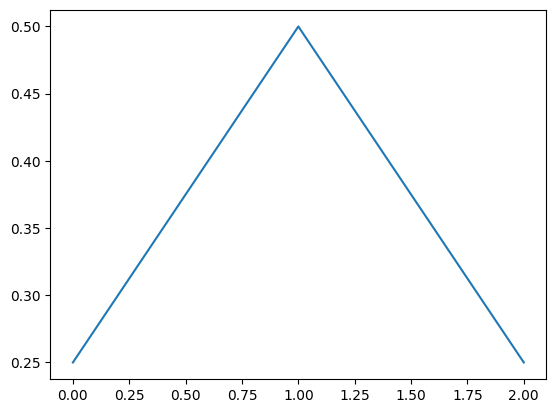

In [3]:
x = count_with_replacement_order([1,0],2)
print(x)
x_array = np.array(x[1])
print(x_array)
x_array1 = np.sum(x_array,axis = 1)
x_array2 = np.unique(x_array1,return_counts=True)
print(x_array2[0])
print(x_array2[1] / len(x_array1))

_, axe = plt.subplots()
axe.plot(x_array2[0], x_array2[1]/len(x_array1))

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]), array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1],
      dtype=int64))


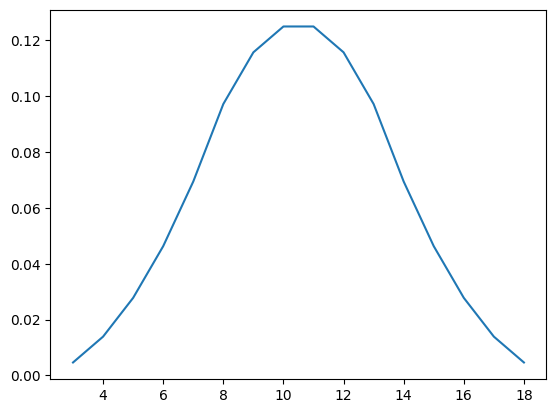

In [4]:
# [주사위를 3번 던져 나온 숫자의 합]의 확률분포
tot, counts = count_with_replacement_order([x for x in range(1,7)],3)
#print(tot)
#print(counts)

counts_np = np.array(counts)
pass1 = np.sum(counts_np,axis = 1)
#print(counts_np)
#print(pass1)
pass2 = np.unique(pass1,return_counts=True)
print(pass2)

_, axe = plt.subplots()

axe.plot(pass2[0], pass2[1]/tot)

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]), array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1],
      dtype=int64))


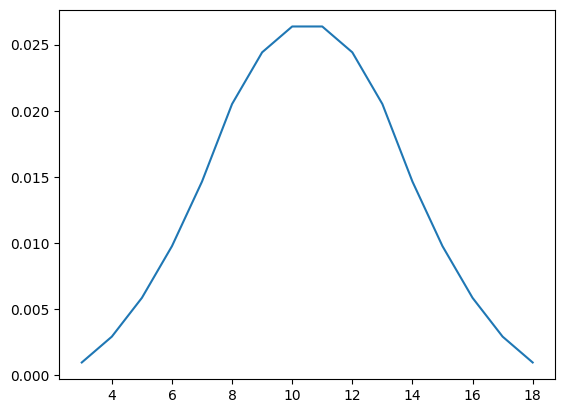

In [5]:
# 동전을 10번 던져(앞 1, 뒤 0 ) 나올 수 있는 합의 분포

tot, counts = count_with_replacement_order([x for x in range(0,2)],10)
#print(tot)
#print(counts)

counts_np = np.array(counts)
pass1 = np.sum(counts_np,axis = 1)
#print(counts_np)
#print(pass1)
#pass2 = np.unique(pass1,return_counts=True)
print(pass2)

_, axe = plt.subplots()

axe.plot(pass2[0], pass2[1]/tot)

1024
[  1  10  45 120 210 252 210 120  45  10   1]
0.0546875


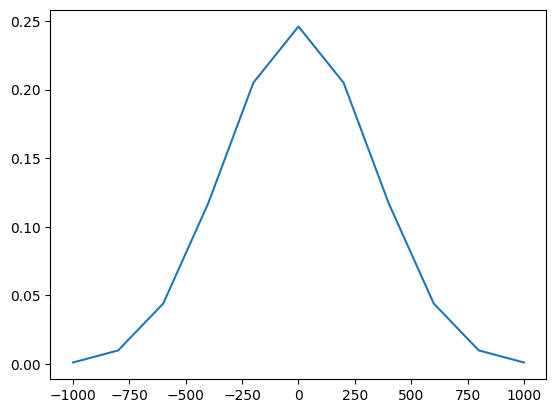

In [6]:
### 동전을 던져, 앞면이 나오면 100원을 주고, 
### 뒷면이 나오면 100원을 받기로 함
### 앞면이 8번 나옴
### 친구 : 동전이 조작되지 않음   ← 귀무가설
### 나 : 동전이 아무래도 조작인것 같다. ← 대립가설
### 유의 수준 5%에서 결정하자 

tot, counts = count_with_replacement_order([-100,100],10)
print(tot)
#print(counts)

counts_np = np.array(counts)
pass1 = np.sum(counts_np,axis = 1)
#print(counts_np)
#print(pass1)
pass2 = np.unique(pass1,return_counts=True)
#print(pass2)

_, axe = plt.subplots()

axe.plot(pass2[0], pass2[1]/tot)

count2 = pass2[1]
print(count2)
print(np.sum(count2[-3:])/tot)      # ← p-value

### 만약 p-value가 합의한 유의수준 5%보다 클경우,
### 발생가능한 일반적인 케이스이므로,
### 귀무가설을 수용,
### 만약 p-value가 합의한 유의수준 5%보다 작을경우,
### 희귀한 케이스에 속하므로
### 귀무가설을 기각, 대립가설을 채택


7776
값: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30] 확률: [0.0001286  0.000643   0.00192901 0.00450103 0.00900206 0.0162037
 0.02636317 0.03922325 0.05401235 0.06944444 0.08371914 0.0945216
 0.10030864 0.10030864 0.0945216  0.08371914 0.06944444 0.05401235
 0.03922325 0.02636317 0.0162037  0.00900206 0.00450103 0.00192901
 0.000643   0.0001286 ]
25 필터: [25]
확률: [0.0162037]
25 보다 큰것: [26 27 28 29 30]
확률: [0.00900206 0.00450103 0.00192901 0.000643   0.0001286 ]
합: 0.016203703703703703


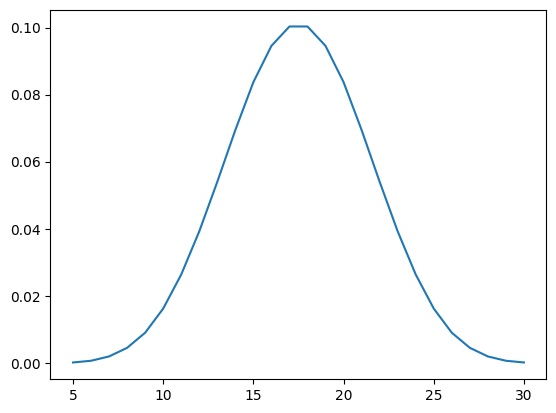

In [7]:
# 주사위를 5번 던졌을떄,
# - 합이 25가 될 확률
# - 합이 25보다 크면, 100원을 받기로 하였다. 합이 25보다 클 확률은 (25 불포함)

tot, counts = count_with_replacement_order([x for x in range(1,7)],5)
print(tot)
#print(counts)

counts_np  = np.array(counts)

#print(counts_np)

pass1 = np.sum(counts_np, axis = 1)
#print(pass1)

pass2 = np.unique(pass1,return_counts=True)
#print(pass2)
v = pass2[0]
prob = pass2[1] / tot

print('값:', v, '확률:',prob)
assert np.sum(prob)== 1.0

index_25 = v == 25
print('25 필터:',v[index_25])
print('확률:',prob[index_25])

index_25H = v > 25
print('25 보다 큰것:',v[index_25H])
print('확률:',prob[index_25H])
print('합:',np.sum(prob[index_25H]))


_, axe = plt.subplots()
axe.plot(v,prob)

17.5 3.8188130791298667


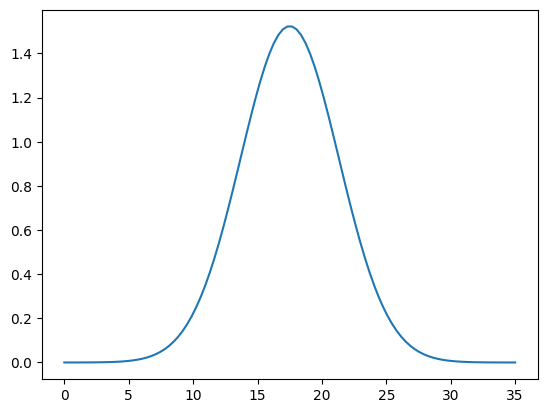

In [9]:
xs = np.linspace(0,35,100)
#xs = np.linspace(-5,5,100)
mu = np.mean(pass1)
sig = np.std(pass1)
print(mu,sig)

_,axe = plt.subplots()
axe.plot(xs,normal(xs,mu,sig))


In [11]:
from scipy import stats

_,axe = plt.subplots()
xs = np.linspace(0,35,100)
axe.plot(xs, stats.norm.pdf(xs, loc = mu , scale = sig))
axe.plot(v, prob)

ModuleNotFoundError: No module named 'scipy'